In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [35]:
data = pd.read_csv('BMI.csv')

In [36]:
data.head(11)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [37]:
data.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [38]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [39]:
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

In [40]:
data['Index'] = data['Index'].apply(give_names_to_indices)

In [41]:
data.head(11)

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight
5,Male,189,104,OverWeight
6,Male,147,92,Extremely Obese
7,Male,154,111,Extremely Obese
8,Male,174,90,OverWeight
9,Female,169,103,Obesity


In [42]:
sns.lmplot('Height','Weight',data,hue='Index',size=7,aspect=1,fit_reg=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [43]:
people = data['Gender'].value_counts()
people

Female    255
Male      245
Name: Gender, dtype: int64

In [44]:
categories = data['Index'].value_counts()
categories

Extremely Obese    198
Obesity            130
Normal              69
OverWeight          68
Weak                22
Extremely Weak      13
Name: Index, dtype: int64

In [45]:
# STATISTIK UNTUK Male
data[data['Gender']=='Male']['Index'].value_counts()

Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Index, dtype: int64

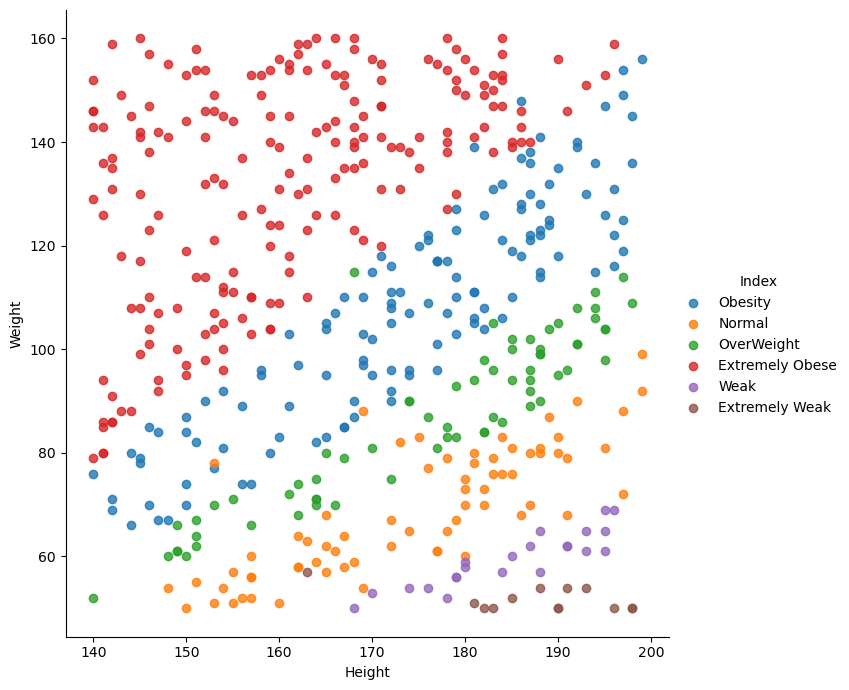

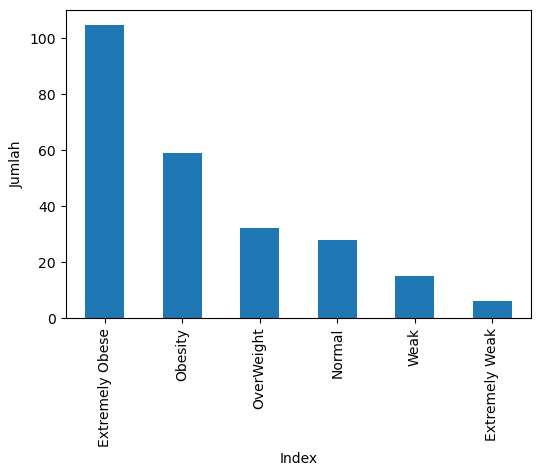

In [46]:
fig = plt.figure(figsize=(6,4))
value_counts = data[data['Gender']=='Male']['Index'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel("Index")
plt.ylabel("Jumlah")
plt.show()

In [47]:
# STATISTIK UNTUK Women
data[data['Gender']=='Female']['Index'].value_counts()

Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: Index, dtype: int64

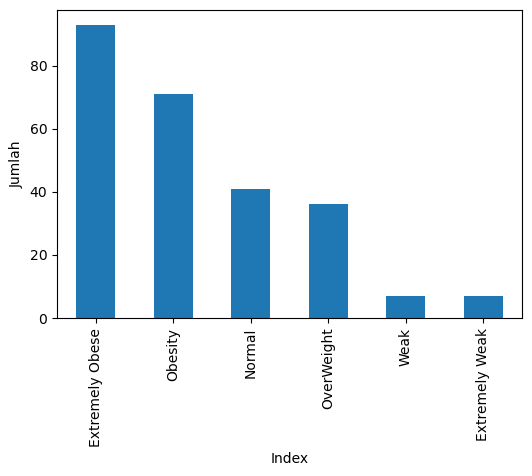

In [48]:
fig = plt.figure(figsize=(6,4))
value_counts = data[data['Gender']=='Female']['Index'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel("Index")
plt.ylabel("Jumlah")
plt.show()

In [49]:
data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)
data.head()

,Height,Weight,Index,Female,Male
0,174,96,Obesity,0,1
1,189,87,Normal,0,1
2,185,110,Obesity,1,0
3,195,104,OverWeight,1,0
4,149,61,OverWeight,0,1


In [50]:
y=data['Index']
data =data.drop(['Index'],axis=1)

In [51]:
data.head()

,Height,Weight,Female,Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204
...,...,...,...,...
495,-1.219155,1.452850,0.980196,-0.980196
496,0.859228,0.463676,0.980196,-0.980196
497,-1.769315,0.927351,0.980196,-0.980196
498,-1.219155,-0.340029,-1.020204,1.020204


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

In [56]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.3s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.3s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.6s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.4s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.5s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.4s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.7s
[CV 2/5] END ..................n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 1000]},
             verbose=3)

In [57]:
grid_cv.best_params_

{'n_estimators': 200}

In [58]:
pred = grid_cv.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  87.33333333333333




In [60]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])
    

In [61]:
#Live predictor

your_details = ['Male',175,80]
print(lp(your_details))

OverWeight


C:\Users\geryh\AppData\Local\Temp\ipykernel_204\3297819548.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
classifier = RandomForestClassifier()

In [63]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
classifier.score(X_train, y_train)

1.0

In [65]:
classifier.score(X_test, y_test)

0.8666666666666667

In [66]:
pickle.dump(classifier, open("model.pkl", "wb"))